In [1]:
import sys, os
project_root = os.path.abspath(os.path.join(os.getcwd(), "../../"))  # You are currently in "/Jupyter" folder
src_path = os.path.join(project_root, "src")
if src_path not in sys.path:
    sys.path.append(src_path)

from JsonMidiCreator import *

In [2]:
# Sets the voice on Channel 5 as SybthStrings 1
ProgramChange(Channel(5), 51) >> Play()

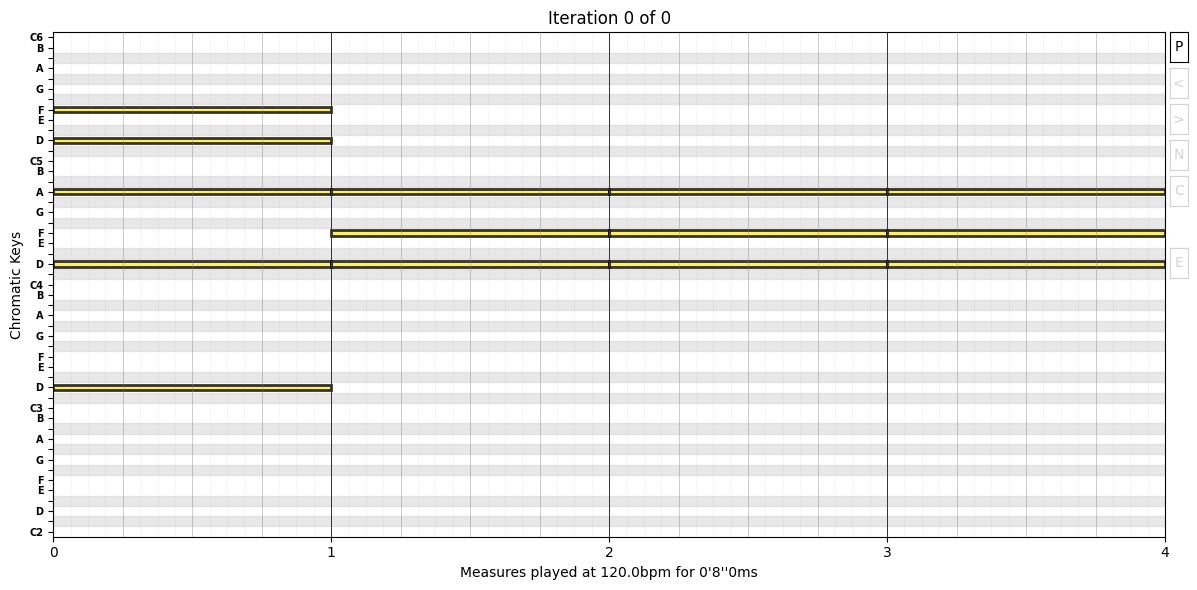

In [17]:
# Starts by sequencing 4 chords on Channel 5
chords_d_minor = PitchChord(Channel(5)) / 4
# Sets the Tonic note D and the minor key signature for all
chords_d_minor << TonicKey("D") << Minor()
# Sets the multiple notes of the chord (Has to use the Frame `First` because a list is a Clip valid parameter)
# Note that these parameters are addictive, so, 4.0 will mean 5.0, the fifth, because, 1.0 + 4.0, and 2.0 will be the 3rd, 1.0 + 2.0 !
chords_d_minor << First()**[Octave(-1), 0, Octave(1), 5.0 - 1, {1: 3.0 - 1}]
chords_d_minor >> Plot() >> Play()